# Lab 3: Visualizing nonlinear regression

Data science is a visual practice. Visualizing your models and their prediction (and their errors) so that you can communicate findings and limitations well is 50% of the job.

We will recreate much of the models shown in class. First load and look through the motorcycle dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('motorcycle.csv')
print(df)

     times  accel
0      2.4    0.0
1      2.6   -1.3
2      3.2   -2.7
3      3.6    0.0
4      4.0   -2.7
..     ...    ...
128   53.2  -14.7
129   55.0   -2.7
130   55.0   10.7
131   55.4   -2.7
132   57.6   10.7

[133 rows x 2 columns]


The dataset column 'times' is the time since impact and 'accel' is the acceleration of the rider's head in g (gravitational force).

The dataset has some duplicated times, and without a way to really interpret what those mean, we should remove them as some methods do not really deal with those well. The following line removes any entries with duplicated 'times' values (keeping only the first to appear).

In [2]:
df = df[~ df['times'].duplicated()]

Now we can plot

<Axes: xlabel='times', ylabel='accel'>

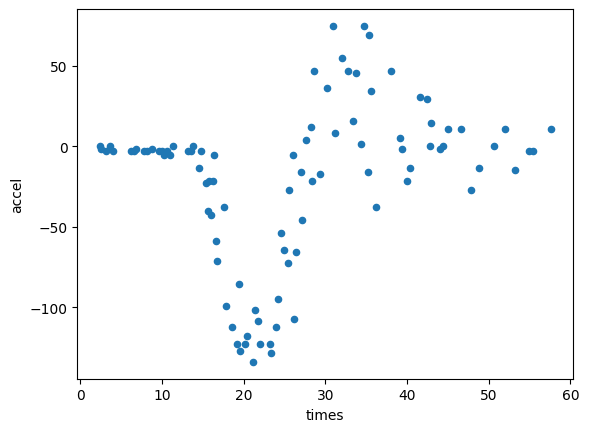

In [3]:
df.plot.scatter(x='times', y='accel')

## Polynomial regression

The first model to fit is polynomial regression. You saw in lecture that polynomial regression (like all basis expansion methods) are simply fit by linear regression with an appropriately constructed basis. 

### Problem 1
Use the method 'sklearn.preprocessing.PolynomialFeatures' to construct those bases and fit a few different polynomials of differing degrees and plot them to compare.

In [4]:
"""
The import statements below are to help you. If you read the documentation, you will see PolynomialFeatures
is used like this:

    pr = PolynomialFeatures(degree=3)  # for a degree 3 polynomial
    X_polynomial = pr.fit_transform(X)
    
Note that, even though we are only dealing with univariate inputs, most scikit-learn routines expect a 2-D matrix
to make predictions.

For a column of a dataframe, you can make sure you have that by doing:

    X = df['times'].to_frame()
    
Or for a numpy array, you can use

    x_line = np.linspace(0, 60, 1000)  # this is just a 1-D array of shape (1000,)
    x_line_2d = x_line.reshape(-1, 1)  # this is now a 2-D array of shape (1000, 1)
    
"""

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

X = df['times'].to_frame()
Y = df['accel']
# 60 here because the data set only goes up to 60
# this will be used later to plot the model
x_line = np.linspace(0, 60, 1000)  # this is just a 1-D array of shape (1000,)
x_line_2d = x_line.reshape(-1, 1)  # this is now a 2-D array of shape (1000, 1)

/Users/kevinkyhalim/Documents/NUS I 4.0/Sem 2/ST5227 Applied Statistical Learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/kevinkyhalim/Documents/NUS I 4.0/Sem 2/ST5227 Applied Statistical Learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/kevinkyhalim/Documents/NUS I 4.0/Sem 2/ST5227 Applied Statistical Learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/Users/kevinkyhalim/Documents/NUS I 4.0/Sem 2/ST5227 Applied Statistical Learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid f

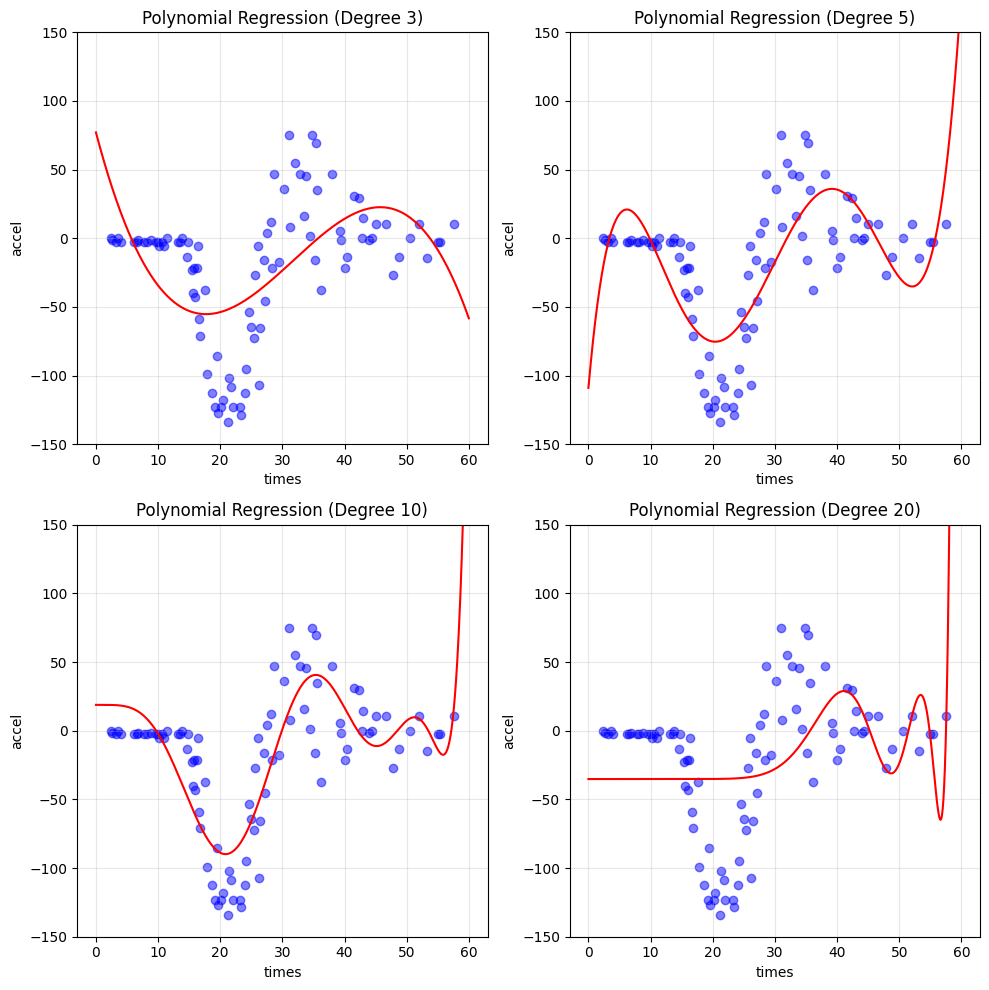

In [5]:
# Create figure and subplots
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))
axes = [ax1, ax2, ax3, ax4]
degrees = [3, 5, 10, 20]
X = df['times'].to_frame()
Y = df['accel']
x_line_2d = x_line.reshape(-1, 1)  # this is now a 2-D array of shape (1000, 1)

# Plot each polynomial fit
for ax, degree in zip(axes, degrees):
    # Create and fit the polynomial regression model
    lr = LinearRegression()
    pr = PolynomialFeatures(degree=degree)
    # Transform the X values to a polynomial of the given degree
    X_polynomial = pr.fit_transform(X)
    # Fit a linear regression on the X_polynomial and Y values
    lr.fit(X_polynomial,Y)
    
    # Transform the x_line_2d to a polynomial
    x_line_poly = pr.transform(x_line_2d)
    # Predict the new Y values using the polynomial form of x_line
    y_predict = lr.predict(x_line_poly)
        
    # Plot original data points
    ax.scatter(X, Y, color='blue', alpha=0.5, label='Data points')
    
    # Plot polynomial fit
    ax.plot(x_line, y_predict, color='red', label=f'Degree {degree}')
    
    # Customize plot
    ax.set_title(f'Polynomial Regression (Degree {degree})')
    ax.set_xlabel('times')
    ax.set_ylabel('accel')
    ax.grid(True, alpha=0.3)
    # Set the y axis to only be from 150 to -150
    ax.set_ylim(-150, 150)

# Adjust layout
plt.tight_layout()
plt.show()

## Regression splines

It is better to use (natural) cubic regression splines. These are the most popular of all regression splines used in practice. Scipy (a scientific programming package that is similar to Numpy and Pandas and is built-in to most Python distributions) has a method 'scipy.interpolate.UnivariateSpline' for natural cubic regression splines.

### Problem 2
Fit a natural cubic regression spline with various regularization parameters, which are called 's' in the method.

In [6]:
"""
After importing, you create and fit the model like:

    s = 100 * len(X)  # the regularization parameter... you can play around with different values
    spl = UnivariateSpline(X, Y, s=s)
    y_pred = spl(x_test)  # to make predictions. Here x_test can be a 1-D array.
    
"""

from scipy.interpolate import UnivariateSpline

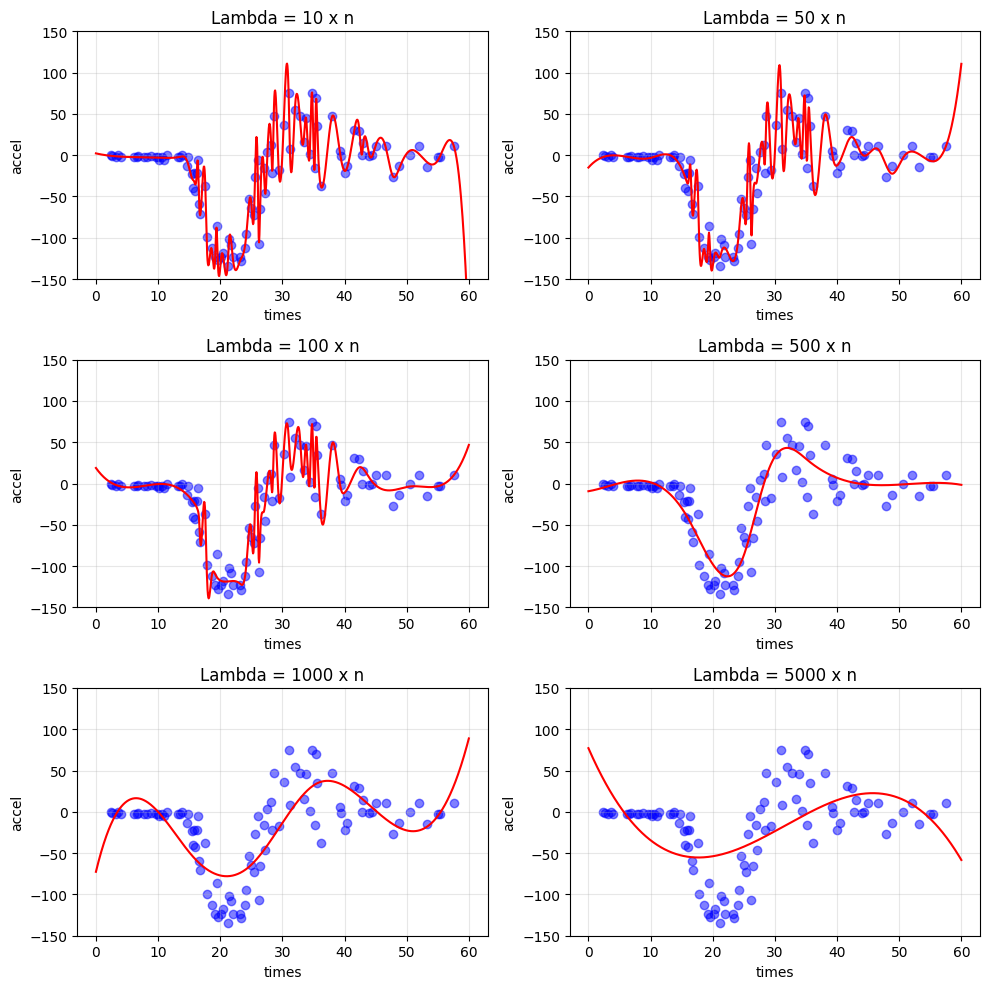

In [7]:
# Create figure and subplots
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, figsize=(10, 10))
axes = [ax1, ax2, ax3, ax4, ax5, ax6]
knots = [10, 50, 100, 500, 1000, 5000]
X = df['times']
Y = df['accel']
# 60 here because the data set only goes up to 60, this will be used later to plot the model
x_line = np.linspace(0, 60, 1000)  # this is just a 1-D array of shape (1000,)

# Plot each regularization parameter
for ax, knots in zip(axes, knots):
    lam = knots * len(X)

    # Fit a regression spline, the default is a cubic spline
    spl = UnivariateSpline(X, Y, s=lam)
    
    # To make predictions. Here x_line can be a 1-D array.
    y_pred = spl(x_line) 
        
    # Plot original data points
    ax.scatter(X, Y, color='blue', alpha=0.5, label='Data points')
    
    # Plot polynomial fit
    ax.plot(x_line, y_pred, color='red', label=f'Lambda = {knots} x n')
    
    # Customize plot
    ax.set_title(f'Lambda = {knots} x n')
    ax.set_xlabel('times')
    ax.set_ylabel('accel')
    ax.grid(True, alpha=0.3)
    # Set the y axis to only be from 150 to -150
    ax.set_ylim(-150, 150)

# Adjust layout
plt.tight_layout()
plt.show()

The natural next step is to choose a good value for the penalty parameter via cross validation. Because this is a relatively small dataset, we probably want to use K-fold cross validation, which uses up as much of the data as possible.

We can not use the cross-validation helper introduced in Lab 2 (last week) so easily, because we are not using a scikit-learn model for the smoothing spline. So instead we can use another scikit-learn cross-validation helper for K-fold cross-validation: 'sklearn.model_selection.KFold'.

### Problem 3
Use cross-validation to select a good value of the penalization parameter for the smoothing spline, and plot that best fit model.

In [8]:
X = df['times'].to_frame()  # converts the times variable (in a pd.Series) to a pd.DataFrame
X

,times
0,2.4
1,2.6
2,3.2
3,3.6
4,4.0
...,...
127,52.0
128,53.2
129,55.0
131,55.4


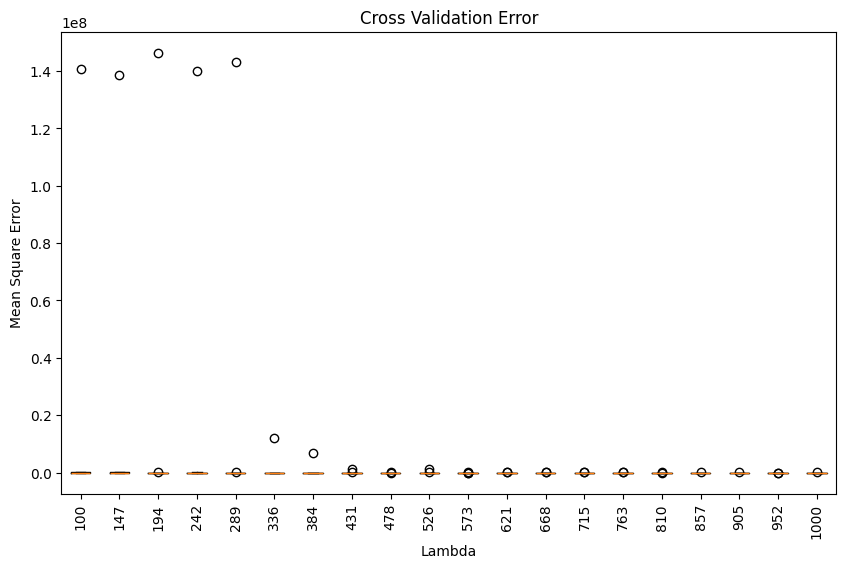

In [23]:
from sklearn.model_selection import KFold

X = df['times'].to_frame()  # converts the times variable (in a pd.Series) to a pd.DataFrame
Y = df['accel']
kf = KFold(n_splits=10)  # K-fold cross validation

parameter = np.linspace(100, 1000, 20)

# for train_index, test_index in kf.split(X):
#     print(train_index)
#     print(test_index)

# Use the mean square error to compute the error
# For each regularization parameter, compute the mean square error for each fold
# Then average the mean square error over all the folds
# The regularization parameter with the smallest average mean square error is the best one
# The best one is the one with the smallest average mean square error
mse_cv = {}  # this time we will use a dictionary structure to contain the scores
for param in parameter:
    mse_cv[str(param)] = []  # initialize this dictionary entry to an empty list

    for train_index, test_index in kf.split(X):
        # split the data into training and test sets
        Y_train = Y.iloc[train_index]  # it is very important to remember to use iloc if using integer index
        X_train = X.iloc[train_index, :].copy()
        
        Y_test = Y.iloc[test_index]
        X_test = X.iloc[test_index, :].copy()        

        lam = param * len(X_train)

        # Fit a regression spline, the default is a cubic spline
        spl = UnivariateSpline(X_train, Y_train, s=lam)
        
        # To make predictions.
        Y_pred = spl(X_test).flatten()

        # Compute the mean square error
        mse_cv[str(param)].append(np.mean((Y_pred - Y_test) ** 2))
    
# Create a box plot of the mean square error for each regularization parameter
plt.figure(figsize=(10, 6))
plt.boxplot(mse_cv.values())
plt.xticks(range(1, len(parameter) + 1), parameter.astype(int), rotation=90)
plt.xlabel('Lambda')
plt.ylabel('Mean Square Error')
plt.title('Cross Validation Error')
plt.show()

In [18]:
# Compute the mean square error for each regularization parameter
mse = {param: np.mean(scores) for param, scores in mse_cv.items()}
print(mse)

# Print the value with the least amount of error
best_param = min(mse, key=mse.get)
print(f'The best parameter is {best_param} with a mean square error of {mse[best_param]}')

{'500.0': 8846.00307673433, '502.63157894736844': 9932.647950915723, '505.2631578947368': 7848.5989048790925, '507.89473684210526': 8973.691371501583, '510.5263157894737': 10352.244862049269, '513.1578947368421': 11354.751126417981, '515.7894736842105': 12554.712796140475, '518.421052631579': 13693.913795279903, '521.0526315789474': 258035.94799714856, '523.6842105263158': 169156.7492045231, '526.3157894736842': 126871.84795284094, '528.9473684210526': 102987.78257885268, '531.578947368421': 82112.9952856099, '534.2105263157895': 64532.90955852218, '536.8421052631579': 54270.78268457251, '539.4736842105264': 45594.623168019214, '542.1052631578948': 38703.799582725514, '544.7368421052631': 32128.046611694597, '547.3684210526316': 27136.32519497989, '550.0': 22566.02027343856}
The best parameter is 505.2631578947368 with a mean square error of 7848.5989048790925


In [22]:
# Do a paired t-test to compare between mse values of different parameters
from scipy.stats import ttest_rel

# Iterate through all param value other than the best_param
for param in parameter:
    if param != best_param:
        print(f't-test p-value between {best_param} and {param}: {ttest_rel(mse_cv[str(best_param)], mse_cv[str(param)]).pvalue}')

t-test p-value between 505.2631578947368 and 500.0: 0.4607494461161291
t-test p-value between 505.2631578947368 and 502.63157894736844: 0.3842878150632031
t-test p-value between 505.2631578947368 and 505.2631578947368: nan
t-test p-value between 505.2631578947368 and 507.89473684210526: 0.24780929085072273
t-test p-value between 505.2631578947368 and 510.5263157894737: 0.23647214422782195
t-test p-value between 505.2631578947368 and 513.1578947368421: 0.21630623883370495
t-test p-value between 505.2631578947368 and 515.7894736842105: 0.20725543468204397
t-test p-value between 505.2631578947368 and 518.421052631579: 0.1986809051894556
t-test p-value between 505.2631578947368 and 521.0526315789474: 0.3340917303636388
t-test p-value between 505.2631578947368 and 523.6842105263158: 0.3269632476517867
t-test p-value between 505.2631578947368 and 526.3157894736842: 0.31903154583585613
t-test p-value between 505.2631578947368 and 528.9473684210526: 0.31093910226835586
t-test p-value between 5

[8846.00307673433,
 9932.647950915723,
 8973.691371501583,
 10352.244862049269,
 11354.751126417981,
 12554.712796140475,
 13693.913795279903,
 258035.94799714856,
 169156.7492045231,
 126871.84795284094,
 102987.78257885268,
 82112.9952856099,
 64532.90955852218,
 54270.78268457251,
 45594.623168019214,
 38703.799582725514,
 32128.046611694597,
 27136.32519497989,
 22566.02027343856]

In [ ]:
# Set index for mse to be the parameter
mse = pd.Series(mse, index=parameter)
# Print the best parameter
print(mse.idxmin())

lam =  * len(X)
# Fit a regression spline, the default is a cubic spline
spl = UnivariateSpline(X, Y, s=lam)

# To make predictions. Here x_line can be a 1-D array.
y_pred = spl(x_line) 
    
# Plot original data points
plt.scatter(X, Y, color='blue', alpha=0.5, label='Data points')

# Plot polynomial fit
plt.plot(x_line, y_pred, color='red', label=f'Lambda = {knots} x n')
# Customize plot
plt.title(f'Lambda = {mse.idxmin()} x n')
plt.xlabel('times')
plt.ylabel('accel')
plt.grid(True, alpha=0.3)
# Set the y axis to only be from 150 to -150
plt.ylim(-150, 150)

plt.show()


From the cross validation method, we found that the best penalty value seems to be 503.1.
We can see this model being fit into the whole data and plotted above.

### Problem 4

We end the lab by coding up those crazy formulas for the smoothing spline from lecture to make them more tangible and not so scary. We will practice this by deriving and coding up the confidence intervals for the fitted models above. See the PDF write up of this exercise.

/Users/kevinkyhalim/Documents/NUS I 4.0/Sem 2/ST5227 Applied Statistical Learning/.venv/lib/python3.12/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


(-150.0, 150.0)

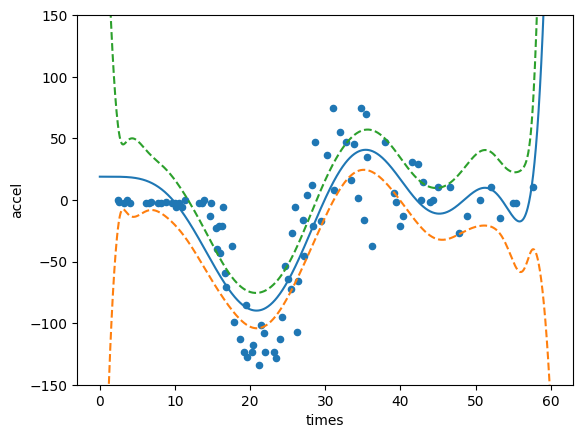

In [24]:
# The following code plots the polynomial regression again with the confidence intervals derived in the PDF write up.

# Plot a degree 10 polynomial
lr = LinearRegression()
pr = PolynomialFeatures(degree=10)

X = df['times'].to_frame()
Y = df['accel']

X_poly = pr.fit_transform(X)
lr.fit(X_poly, Y)

x_line = np.linspace(0, 60, 1000)
x_line_poly = pr.transform(x_line.reshape(-1, 1))  # 1000 x d
y_line = lr.predict(x_line_poly)

# estimate the noise
s2 = (1 / len(Y)) * np.sum((Y - lr.predict(X_poly))**2)

# now estimate the CI bars
BTB_inv = np.linalg.inv(np.matmul(X_poly.T, X_poly))  # d x d

se_line = np.zeros(len(y_line))
for i_ in range(len(y_line)):
    temp = np.matmul(x_line_poly[i_, :], BTB_inv)  # d-vector
    temp2 = np.matmul(temp, x_line_poly[i_, :])
    se_line[i_] = np.sqrt(temp2)
    
# compute the lower CI bound
y_lower = y_line - 2 * np.sqrt(s2) * se_line  # vectorized computation
y_upper = y_line + 2 * np.sqrt(s2) * se_line

# finally plot everything
df.plot.scatter(x='times', y='accel')  # plot data
plt.plot(x_line, y_line)  # plot prediction line
plt.plot(x_line, y_lower, '--')  # plot lower bound
plt.plot(x_line, y_upper, '--')  # plot upper bound
plt.ylim(-150, 150)

In [25]:
# various routines to compute the basis fuctions and their derivatives
def pos_part(x0, knot):
    if x0 > knot:
        # this ensure that only when x0 is above the knot, then we return the value
        return (x0 - knot)**3
    else:
        return 0

# X is to indicate the knot values / locations
# x0 is where the X values are given
def nat_basis_j(jp2, X, x0):
    """
    Compute the natural basis functions at query point x0 
    (where there is a knot at each data point location in X).
    Assume jp2 is 1-indexed to match our slides from lecture.
    """
    # first basis
    if jp2 == 1:
        return 1
    # second basis
    if jp2 == 2:
        return x0
    
    j = jp2 - 2  # at the very least this is 1
    n = len(X) # number of data points
    xn = X[n-1] # last data point
    xn_minus_1 = X[n-2] # second to last data point
    xj = X[j-1] # j-th data point
    
    first_term = (pos_part(x0, xj) - pos_part(x0, xn)) / (xn - xj)
    second_term = (pos_part(x0, xn_minus_1) - pos_part(x0, xn)) / (xn - xn_minus_1)
    return first_term - second_term

def nat_basis(X, x0):
    "We return the vector of n basis functions at the query point x0"
    n = len(X)
    result = np.zeros(n)
    for i_ in range(n):
        result[i_] = nat_basis_j(i_ + 1, X, x0)
    return result

def nat_basis_j_d2(jp2, X, x0):
    """
    Compute the second derivative of the natural basis functions.
    Assume jp2 is 1-indexed to match our slides from lecture.
    """
    
    if (jp2 == 1) or (jp2 == 2):
        return 0
    
    j = jp2 - 2  # at the very least this is 1
    n = len(X)
    xn = X[n-1]
    xn_minus_1 = X[n-2]
    xj = X[j-1]
    
    if (x0 > xn) or (x0 <= xj):
        return 0
    
    if (x0 <= xn) and (x0 > xn_minus_1):
        return 6 * (x0 - xj) / (xn - xj) - 6 * (x0 - xn_minus_1) / (xn - xn_minus_1)
    
    if (x0 <= xn_minus_1) and (x0 > xj):
        return 6 * (x0 - xj) / (xn - xj)

In [26]:
X.values

array([[ 2.4],
       [ 2.6],
       [ 3.2],
       [ 3.6],
       [ 4. ],
       [ 6.2],
       [ 6.6],
       [ 6.8],
       [ 7.8],
       [ 8.2],
       [ 8.8],
       [ 9.6],
       [10. ],
       [10.2],
       [10.6],
       [11. ],
       [11.4],
       [13.2],
       [13.6],
       [13.8],
       [14.6],
       [14.8],
       [15.4],
       [15.6],
       [15.8],
       [16. ],
       [16.2],
       [16.4],
       [16.6],
       [16.8],
       [17.6],
       [17.8],
       [18.6],
       [19.2],
       [19.4],
       [19.6],
       [20.2],
       [20.4],
       [21.2],
       [21.4],
       [21.8],
       [22. ],
       [23.2],
       [23.4],
       [24. ],
       [24.2],
       [24.6],
       [25. ],
       [25.4],
       [25.6],
       [26. ],
       [26.2],
       [26.4],
       [27. ],
       [27.2],
       [27.6],
       [28.2],
       [28.4],
       [28.6],
       [29.4],
       [30.2],
       [31. ],
       [31.2],
       [32. ],
       [32.8],
       [33.4],
       [33

In [30]:
print(N.shape)
print(N[93])

(94, 94)
[1.00000e+00 5.76000e+01 3.04220e+03 3.02016e+03 2.95452e+03 2.91116e+03
 2.86812e+03 2.63712e+03 2.59616e+03 2.57580e+03 2.47520e+03 2.43552e+03
 2.37660e+03 2.29916e+03 2.26092e+03 2.24192e+03 2.20416e+03 2.16672e+03
 2.12960e+03 1.96652e+03 1.93116e+03 1.91360e+03 1.84416e+03 1.82700e+03
 1.77600e+03 1.75916e+03 1.74240e+03 1.72572e+03 1.70912e+03 1.69260e+03
 1.67616e+03 1.65980e+03 1.59516e+03 1.57920e+03 1.51616e+03 1.46972e+03
 1.45440e+03 1.43916e+03 1.39392e+03 1.37900e+03 1.32012e+03 1.30560e+03
 1.27680e+03 1.26252e+03 1.17852e+03 1.16480e+03 1.12412e+03 1.11072e+03
 1.08416e+03 1.05792e+03 1.03200e+03 1.01916e+03 9.93720e+02 9.81120e+02
 9.68600e+02 9.31520e+02 9.19320e+02 8.95160e+02 8.59520e+02 8.47800e+02
 8.36160e+02 7.90400e+02 7.45920e+02 7.02720e+02 6.92120e+02 6.50520e+02
 6.10200e+02 5.80800e+02 5.61600e+02 5.33400e+02 5.15000e+02 4.96920e+02
 4.88000e+02 4.79160e+02 4.53120e+02 3.79320e+02 3.33720e+02 3.26400e+02
 3.04920e+02 2.91000e+02 2.51160e+02 2.262

In [28]:
# Now compute the awful looking expressions for the matrices N and R

# make the matrix N 
n = len(X)
N = np.zeros([n, n])
for i_ in range(n):
    for k_ in range(n):
        N[i_, k_] = nat_basis_j(k_ + 1, X.values, X.values[i_])

# make the matrix R
from scipy.integrate import quad

xmin, xmax = 0, 60

n = len(X)
R = np.zeros([n, n])
for i_ in range(n):
    for k_ in range(n):
        result = quad(lambda x0: nat_basis_j_d2(i_ + 1, X.values, x0) * nat_basis_j_d2(k_ + 1, X.values, x0), 
                      xmin, xmax)
        R[i_, k_] = result[0]
    print("Completed row %d" % i_)  # to check progress because it's a bit slow

/var/folders/7j/0rhz18qs4d9dzfjkz9p2xlcr0000gn/T/ipykernel_4562/376820431.py:8: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  N[i_, k_] = nat_basis_j(k_ + 1, X.values, X.values[i_])


Completed row 0
Completed row 1
Completed row 2
Completed row 3
Completed row 4
Completed row 5
Completed row 6
Completed row 7
Completed row 8
Completed row 9
Completed row 10
Completed row 11
Completed row 12
Completed row 13
Completed row 14
Completed row 15
Completed row 16
Completed row 17
Completed row 18
Completed row 19
Completed row 20
Completed row 21
Completed row 22
Completed row 23
Completed row 24
Completed row 25
Completed row 26
Completed row 27
Completed row 28
Completed row 29
Completed row 30
Completed row 31
Completed row 32
Completed row 33
Completed row 34
Completed row 35
Completed row 36
Completed row 37
Completed row 38
Completed row 39
Completed row 40
Completed row 41
Completed row 42
Completed row 43
Completed row 44
Completed row 45
Completed row 46
Completed row 47
Completed row 48
Completed row 49
Completed row 50
Completed row 51
Completed row 52
Completed row 53
Completed row 54
Completed row 55
Completed row 56
Completed row 57
Completed row 58
Complet

Text(0.5, 1.0, 'lambda = 500 x n')

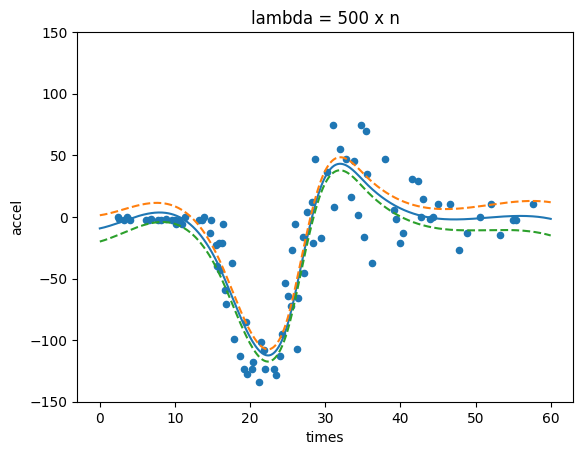

In [29]:
from scipy.interpolate import UnivariateSpline

X = df['times']
Y = df['accel']

alpha = 500
lambda_ = alpha * len(X)
spl = UnivariateSpline(X, Y, s=lambda_)

x_line = np.linspace(0, 60, 500)
y_line = spl(x_line)

n = len(X)
N_line = np.zeros([len(x_line), n])
for i_ in range(len(x_line)):
    N_line[i_, :] = nat_basis(X.values, x_line[i_])  # an n-vector for each i_

# estimate the noise
s2 = (1 / len(Y)) * np.sum((Y - spl(X.values))**2)

# now estimate the CI bars
# Calculate the variance of theta and compute them here
NTN_pR = np.matmul(N.T, N) + lambda_ * R
NTN_pR_inv = np.linalg.inv(NTN_pR)  # n x n

se_line = np.zeros(len(y_line))
for i_ in range(len(y_line)):
    # why is there a N_line here?
    temp = np.matmul(N_line[i_, :], NTN_pR_inv)  # n-vector
    temp2 = np.matmul(temp, N.T)
    se_line[i_] = np.sqrt(np.sum(temp2 ** 2))
    
# compute the lower CI bound
y_lower = y_line - 2 * np.sqrt(s2) * se_line  # vectorized computation
y_upper = y_line + 2 * np.sqrt(s2) * se_line

# now plot everything
df.plot.scatter(x='times', y='accel')
plt.plot(x_line, y_line)
plt.plot(x_line, y_upper, '--')
plt.plot(x_line, y_lower, '--')
plt.ylim(-150, 150)
plt.title('lambda = %d x n' % alpha)